<a href="https://colab.research.google.com/github/Rousoll/TM240-TMA/blob/main/STMSAI2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

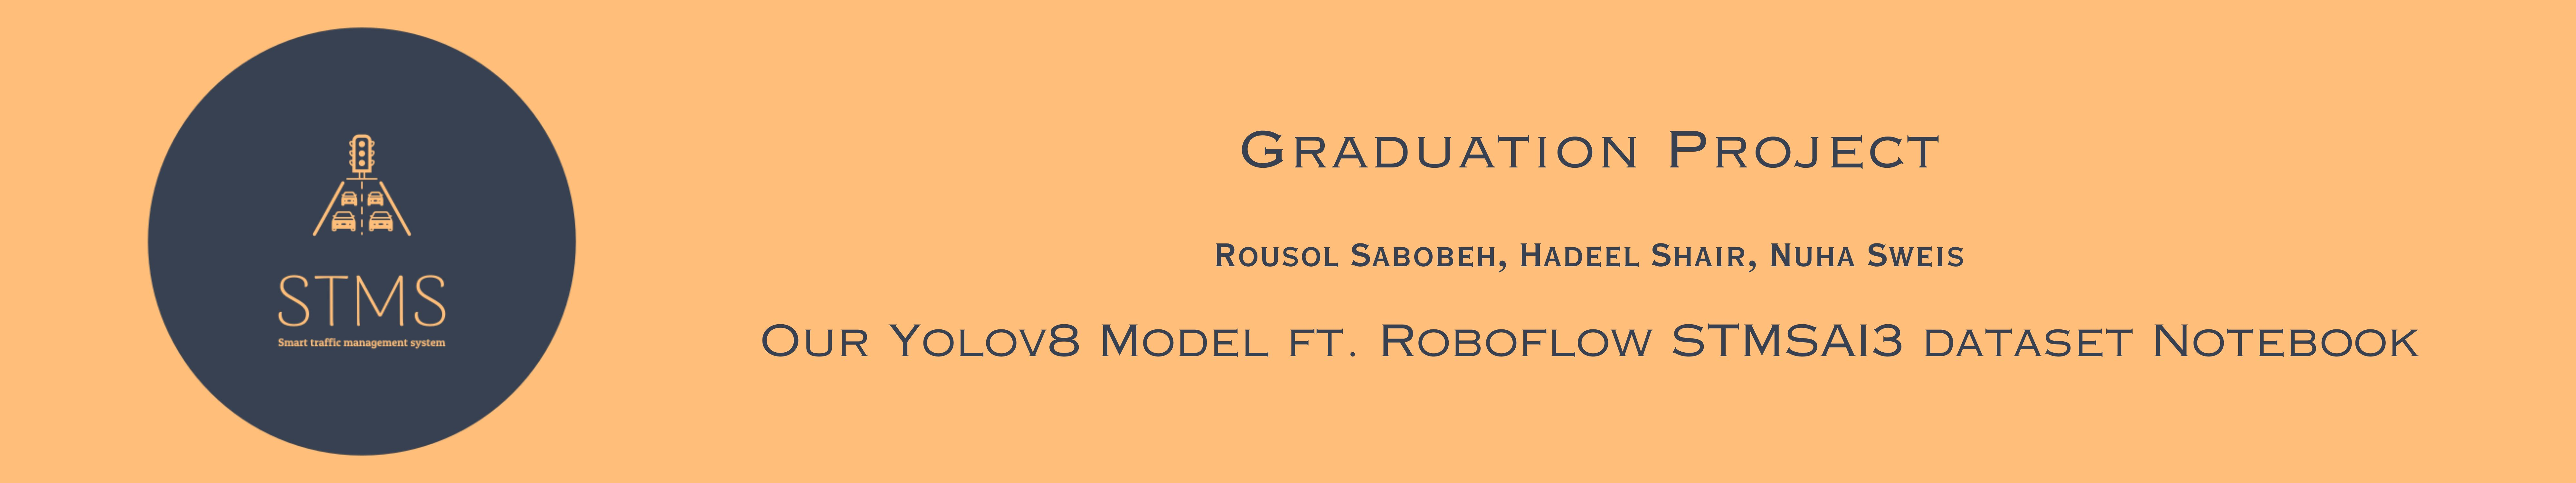

In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.171 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.5/107.7 GB disk)


In [4]:
from IPython.display import display, Image

In [5]:
import ultralytics
from ultralytics import settings

#Update settings
settings.update({'dataset_dir': '/content/stmsai3-1'})

In [6]:
from ultralytics import YOLO
##here to start the training
# Create a new YOLO model from scratch
model = YOLO('yolov8n.yaml')

# Load a pretrained YOLO model (recommended for training)
model = YOLO('yolov8n.pt')

# Train the model using the 'coco128.yaml' dataset for 3 epochs
results = model.train(data='coco128.yaml', epochs=3)

# Evaluate the model's performance on the validation set
results = model.val()

# Export the model to ONNX format
success = model.export(format='onnx')



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================




image 1/1 /content/datasets/coco128/images/train2017/000000000064.jpg: 640x480 1 car, 1 clock, 342.9ms
Speed: 2.4ms preprocess, 342.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)


Object type: clock
Coordinates: [109, 36, 262, 196]
Probability: 0.8
---
Object type: car
Coordinates: [51, 393, 228, 526]
Probability: 0.75
---


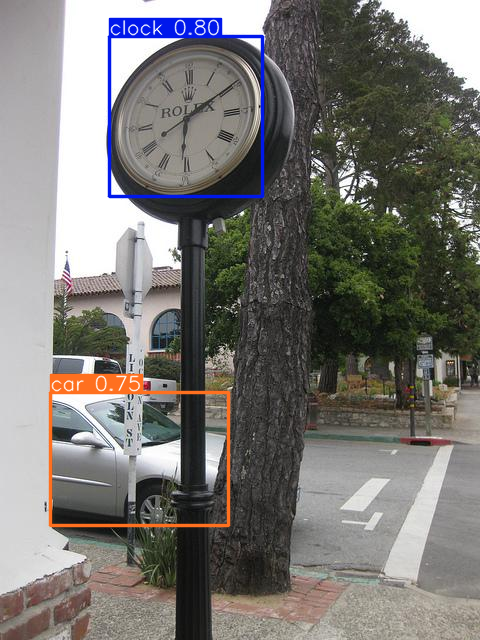

In [7]:
from ultralytics import YOLO
import cv2

# Load a pretrained YOLOv8 model
model = YOLO('yolov8n.pt')

# Read an image
img = cv2.imread('/content/datasets/coco128/images/train2017/000000000064.jpg')

# Make predictions on the image
results = model.predict('/content/datasets/coco128/images/train2017/000000000064.jpg')
result = results[0]
len(result.boxes)
box = result.boxes[0]
for box in result.boxes:
  class_id = result.names[box.cls[0].item()]
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  conf = round(box.conf[0].item(), 2)
  print("Object type:", class_id)
  print("Coordinates:", cords)
  print("Probability:", conf)
  print("---")

from PIL import Image
Image.fromarray(result.plot()[:,:,::-1])

In [8]:
!pip install roboflow

In [9]:
from ultralytics import YOLO

# Create a new YOLO model from scratch
model = YOLO('yolov8n.yaml')

# Load a pretrained YOLO model (recommended for training)
model = YOLO('yolov8n.pt')

# Train the model using the 'coco128.yaml' dataset for 3 epochs
results = model.train(data='/content/stmsai3-1/data.yaml', epochs=3)

# Evaluate the model's performance on the validation set
results = model.val()

# Export the model to ONNX format
success = model.export(format='onnx')


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



In [10]:
from roboflow import Roboflow
rf = Roboflow(api_key="JZ2sFGntQAkH4HwE3IXS")
project = rf.workspace("stmsai3").project("stmsai3-fpg0i")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.171, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to stmsai3-1 in yolov8:: 100%|██████████| 112/112 [00:00<00:00, 1393.81it/s]


In [12]:
from roboflow import Roboflow
rf = Roboflow(api_key="JZ2sFGntQAkH4HwE3IXS")
project = rf.workspace().project("stmsai3-fpg0i")
model = project.version(1).model


loading Roboflow workspace...
loading Roboflow project...
{'predictions': [{'x': 323.0, 'y': 466.5, 'width': 112.0, 'height': 171.0, 'confidence': 0.994769275188446, 'class': 'car', 'image_path': '/content/emergency.png', 'prediction_type': 'ObjectDetectionModel'}, {'x': 56.0, 'y': 340.0, 'width': 102.0, 'height': 96.0, 'confidence': 0.9945728778839111, 'class': 'car', 'image_path': '/content/emergency.png', 'prediction_type': 'ObjectDetectionModel'}, {'x': 279.5, 'y': 135.5, 'width': 27.0, 'height': 35.0, 'confidence': 0.9845839142799377, 'class': 'truck', 'image_path': '/content/emergency.png', 'prediction_type': 'ObjectDetectionModel'}, {'x': 231.0, 'y': 262.0, 'width': 64.0, 'height': 92.0, 'confidence': 0.9648185968399048, 'class': 'ambulance', 'image_path': '/content/emergency.png', 'prediction_type': 'ObjectDetectionModel'}, {'x': 195.0, 'y': 228.0, 'width': 38.0, 'height': 36.0, 'confidence': 0.9620742797851562, 'class': 'car', 'image_path': '/content/emergency.png', 'predictio

In [13]:
# infer on a local image
print(model.predict("/content/emergency.png", confidence=40, overlap=30).json())

# visualize your prediction
model.predict("/content/emergency.png", confidence=40, overlap=30).save("prediction.jpg")

# infer on an image hosted elsewhere
print(model.predict("/content/emergency.png", confidence=40, overlap=30).json())

{'predictions': [{'x': 323.0, 'y': 466.5, 'width': 112.0, 'height': 171.0, 'confidence': 0.994769275188446, 'class': 'car', 'image_path': '/content/emergency.png', 'prediction_type': 'ObjectDetectionModel'}, {'x': 56.0, 'y': 340.0, 'width': 102.0, 'height': 96.0, 'confidence': 0.9945728778839111, 'class': 'car', 'image_path': '/content/emergency.png', 'prediction_type': 'ObjectDetectionModel'}, {'x': 279.5, 'y': 135.5, 'width': 27.0, 'height': 35.0, 'confidence': 0.9845839142799377, 'class': 'truck', 'image_path': '/content/emergency.png', 'prediction_type': 'ObjectDetectionModel'}, {'x': 231.0, 'y': 262.0, 'width': 64.0, 'height': 92.0, 'confidence': 0.9648185968399048, 'class': 'ambulance', 'image_path': '/content/emergency.png', 'prediction_type': 'ObjectDetectionModel'}, {'x': 195.0, 'y': 228.0, 'width': 38.0, 'height': 36.0, 'confidence': 0.9620742797851562, 'class': 'car', 'image_path': '/content/emergency.png', 'prediction_type': 'ObjectDetectionModel'}, {'x': 443.0, 'y': 171.0,